# CEO-REQUEST CHALLENGE

> Should Olist remove underperforming products/categories from its marketplace?

In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from olist.product_updated import Product
product = Product()
products = product.get_training_data()
products.shape

(31484, 20)

In [8]:
from olist.seller_updated import Seller
seller = Seller()
sellers = seller.get_training_data()
sellers.shape

(2967, 18)

In [9]:
olist_revenues_from_monthly_subscriptions = sellers.months_on_olist.sum()*80
olist_revenues_from_monthly_subscriptions

1430240.0

In [10]:
olist_revenues = products.revenues.sum() + olist_revenues_from_monthly_subscriptions
olist_gross_profits = olist_revenues - products.cost_of_reviews.sum()
olist_gross_profits

1140343.0650000004

<AxesSubplot:xlabel='profits', ylabel='Count'>

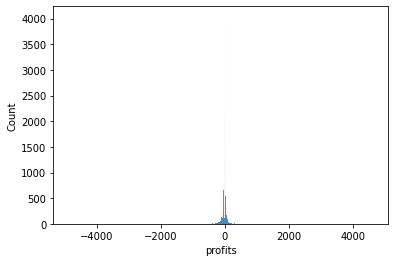

In [11]:
sns.histplot(products.profits, kde=False)

In [12]:
sorted_products = products.sort_values(by='profits')[['profits', 'n_orders', 'revenues']].reset_index()
sorted_products.head()

,index,profits,n_orders,revenues
0,13095,-4877.444,467,4302.556
1,20304,-3691.280,287,2038.720
2,17088,-3653.331,225,1386.669
3,16313,-3376.075,156,1543.925
4,16536,-3246.680,62,543.320


<AxesSubplot:>

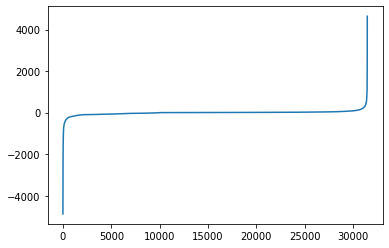

In [13]:
sorted_products.profits.plot()

#### Compute Olist's net_profits for various seller cut-offs

In [14]:
# Let's create arrays "xxx_per_seller_removed" which list,
# for each number of sellers removed (from 1 to len(seller)), 
# the impact on profit

Text(0.5, 0, 'number of products to remove')

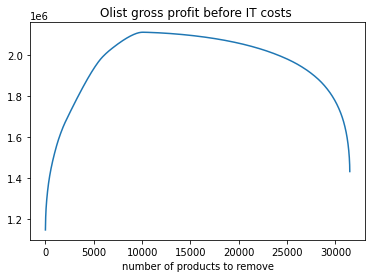

In [15]:
# Analysis excluding IT costs
revenues_per_product_removed = olist_revenues - np.cumsum(sorted_products.revenues)
gross_profits_per_product_removed = olist_gross_profits - np.cumsum(sorted_products.profits)

gross_profits_per_product_removed.plot()
plt.title('Olist gross profit before IT costs ')
plt.xlabel('number of products to remove')

In [16]:
# Add the IT costs of Olist's platform
# IT costs =  A * (n_orders)**0.5

# First, compute A
olist_it_costs_all_orders = 500000
A = olist_it_costs_all_orders / (sellers['n_orders'].sum()**0.5)
A

1582.3973364219244

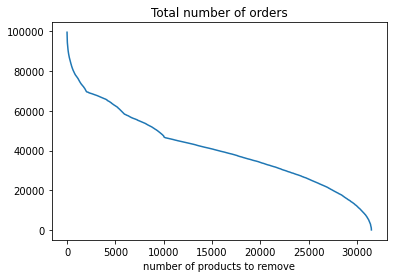

In [17]:
# Then, compute n_order per scenario
n_orders_per_product_removed = sorted_products.n_orders.sum() - np.cumsum(sorted_products.n_orders)
plt.plot(n_orders_per_product_removed)
plt.title('Total number of orders'); plt.xlabel('number of products to remove');

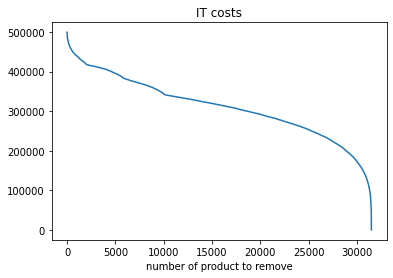

In [18]:
# Create array of it_costs per scenario
it_costs_per_product_removed = A * n_orders_per_product_removed**0.5
plt.plot(it_costs_per_product_removed)
plt.title('IT costs'); plt.xlabel('number of product to remove');

In [19]:
# Compute final metrics (profits and margin, for each scenario)
profits_per_product_removed = gross_profits_per_product_removed - it_costs_per_product_removed
margin_per_product_removed = profits_per_product_removed / revenues_per_product_removed

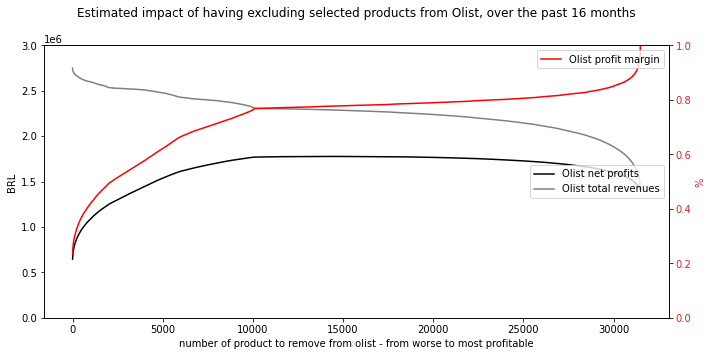

In [20]:
fig, ax1 = plt.subplots(figsize=(10,5))
x = np.arange(0, len(products), 1)

plt.suptitle("Estimated impact of having excluding selected products from Olist, over the past 16 months")

ax1.set_xlabel('number of product to remove from olist - from worse to most profitable')
ax1.set_ylabel('BRL')
ax1.plot(x, profits_per_product_removed, color='black', label='Olist net profits')
ax1.plot(x, revenues_per_product_removed, color='grey', label='Olist total revenues')
ax1.tick_params(axis='y')
ax1.legend(loc='center right')
ax1.set(ylim=[0,3000000])


ax3 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax3.set_ylabel('%', color=color)  # we already handled the x-label with ax1
ax3.plot(x, margin_per_product_removed, color='red', label='Olist profit margin')
ax3.tick_params(axis='y', labelcolor=color)
ax3.legend(loc='upper right')
ax3.set(ylim=[0,1])

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

☝️ This is only a partial analysis: by cutting too many products out of olist, we cannot plausibly expect sellers to pay their monthly fee! 

**A cross-analysis between sellers and products is required**